# aff_poly_sig: Affine and polynomial methods for signatures

> Code for Laplace transform of the signature of a one dimensional Brownian motion and expected signature of generic stochastic processes.

## Theoretical results

The code proposed here is based on the results of the following papers.

- C. Cuchiero, G. Gazzani, J. Möller, and S. Svaluto-Ferro. Joint calibration to SPX and
VIX options with signature-based models. ArXiv e-prints, 2023. https://arxiv.org/abs/2301.13235.

- C. Cuchiero, S. Svaluto-Ferro, and J. Teichmann. Signature SDEs from an affine and polynomial perspectiv. ArXiv e-prints, 2023.

## How to install

After cloning the repository, `cd` (change directory) to the repo and enter this into your terminal:

```sh
pip install -e .
```

## How to use

### Expected signature and moments of a polynomial process

The goal of this code is to compute the expected signature $\mathbb E[\mathbb X_T]$ of a polynomial process $X$. In the one dimensional case it also provides an expression for its moments. As a first step import the following functions.

In [ ]:
from aff_poly_sig.exp_sig import expsig, withwords, expsig_withwords, moments

Next, define the parameters of the polynomial process of interest. Given the drift vector
$$b(X_t)^i=b_i+\sum_{j=0}^db_{ij}X_t^j,$$
and the diffusion matrix
$$a(X_t)^{ij}=a_{ij}+\sum_{k=0}^da_{ijk}X_t^k+\sum_{k,h=0}^da_{ijkh}X_t^kX_t^h,$$
we use the following parametrisation of the characteristics
\begin{align*}
b_{const}[i]&=b_i,& b_{lin}[i,j]&=b_{ij},\\
a_{const}[i,j]&=a_{ij},& a_{lin}[i,j,k]&=a_{ijk},& a_{quad}[i,j,k,h]=a_{ijkh}.
\end{align*}
Coefficients need then to be saved in a tuple as illustrated in the code below. Define also the initial condition $x_0$.



For this example we consider a one dimensional Jacobi process without drift setting $b(X_t)^0=0$ and $a(X_t)^{00}=X_t^0(1-X_t)^0$. We set $x_0=1/2$.

In [ ]:
import numpy as np

#Dimension of the process
dim=1

#Coefficients of the characteristics
b_const=np.zeros(dim)
b_lin=np.zeros((dim,dim))
a_const=np.zeros((dim,dim))
a_lin=np.zeros((dim,dim,dim))
a_quad=np.zeros((dim,dim,dim,dim))

a_lin[0]=1
a_quad[0]=-1

coeff=(b_const,b_lin,a_const,a_lin,a_quad)

x0=np.zeros(dim)
x0[0]=1/2

The last parameters to define are given by the lenght of the expected signature we would like to compute (`len_max`) and the time at which we would like to do it (`T`).

In [ ]:
len_max=10
T=1

To get the expected signature we can then use the function `expsig`.

In [ ]:
expsig(coeff,x0,len_max,dim,T)

  0%|          | 0/10 [00:00<?, ?it/s]

array([1.00000000e+00, 0.00000000e+00, 7.90150699e-02, 0.00000000e+00,
       1.45583443e-03, 0.00000000e+00, 1.14548260e-05, 0.00000000e+00,
       4.94622744e-08, 0.00000000e+00, 1.34438690e-10])

To obtain a better readable output one can use the function `withwords`.

In [ ]:
E=expsig(coeff,x0,len_max,dim,T)
withwords(E,dim)

  0%|          | 0/10 [00:00<?, ?it/s]

[[1.0, []],
 [0.07901506985356974, [0, 0]],
 [0.0014558344297645905, [0, 0, 0, 0]],
 [1.145482602482784e-05, [0, 0, 0, 0, 0, 0]],
 [4.94622743536099e-08, [0, 0, 0, 0, 0, 0, 0, 0]],
 [1.3443868989326117e-10, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]

The same result can be obtained directly using `expsig_withwords`, which combines the two steps above.

In [ ]:
expsig_withwords(coeff,x0,len_max,dim,T)

  0%|          | 0/10 [00:00<?, ?it/s]

[[1.0, []],
 [0.07901506985356974, [0, 0]],
 [0.0014558344297645905, [0, 0, 0, 0]],
 [1.145482602482784e-05, [0, 0, 0, 0, 0, 0]],
 [4.94622743536099e-08, [0, 0, 0, 0, 0, 0, 0, 0]],
 [1.3443868989326117e-10, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]

In one dimension (`dim`=1) we can also use the function `moments` to compute the moments of the process.

In [ ]:
moments(coeff,x0,len_max,dim,T)

  0%|          | 0/10 [00:00<?, ?it/s]

array([1.        , 0.5       , 0.40803014, 0.36204521, 0.33448524,
       0.31613774, 0.30305083, 0.29324856, 0.28563369, 0.27954838,
       0.2745743 ])

### Laplace transform in the Brownian setting

The goal of this code is to compute the Laplace transform $\mathbb E[e^{\langle \mathbf u^{sig}, \mathbb X_t^{sig}\rangle}]$ and $\mathbb E[e^{\langle \mathbf u^{pow}, \mathbb X_t^{pow}\rangle}]$, where $X$ denotes a Brownian motion and $\mathbb X^{sig}$ and $\mathbb X^{pow}$ the corresponding extensions. Precisely, we consider the following two extensions: the signature
$$\mathbb X_t^{sig}:=(1,X_t,\frac {X_t^2}2,\ldots),$$
and the power sequence
$$\mathbb X_t^{pow}:=(1,X_t,X_t^2,\ldots).$$
As a first step import the following functions.

In [ ]:
from aff_poly_sig.riccati_bm import appr_exp_sig, appr_exp_pow, MC, CoD

Next, we introduce the parameters of interest. We in particular have `T` for the time horizon, `K_u` for the lenght of (the approximation of) $\mathbf u^{sig}$ and $\mathbf u^{pow}$, `u_sig` for $\mathbf u^{sig}$ with the signature's extension, and `u_pow` for $\mathbf u^{pow}$ with the power sequence's extension.
As an example we compute 
$$\mathbb E[\exp(-2\frac{X_t^2}2)]=\mathbb E[\exp(-X_t^2)]$$
for each $t\in[0,T]$, where $X$ denotes a Brownian Motion and $T=1$.
The corresponding parameters are given in the following cell.

In [ ]:
import math 
import matplotlib.pyplot as plt

T=1 # [0,T] time horizon

#u in terms of the sig lift
K_u=5
u_sig=np.zeros(K_u) 
u_sig[2]=-2

#u in terms of the powers lift
u_pow=u_sig.copy()
for k in range(0,K_u):
    u_pow[k]=u_pow[k]/math.factorial(k)

One then just needs to fix the computational parameters, namely the grid for the computation of the signature (`timegrid`) and the trucation's level `K` for the solution.

In [ ]:
n_time=1000
timegrid = np.linspace(0,T,n_time)
K=30

The desired Laplace transform can then be computed using `appr_exp_sig` and `appr_exp_pow`. The finals `sig` and `pow` denote the employed extensions.

In [ ]:
L_sig=appr_exp_sig(u_sig,timegrid,K)
L_pow=appr_exp_pow(u_pow,timegrid,K)

To test the results, one can compare them to the results obtained by a Monte Carlo approximation. That's what the `MC` function does.

In [ ]:
N=100000 # number of samples
n_MC=1000 # number of times ticks
MonteCarlo = MC(u_sig,T,n_MC,N)

  0%|          | 0/1000 [00:00<?, ?it/s]

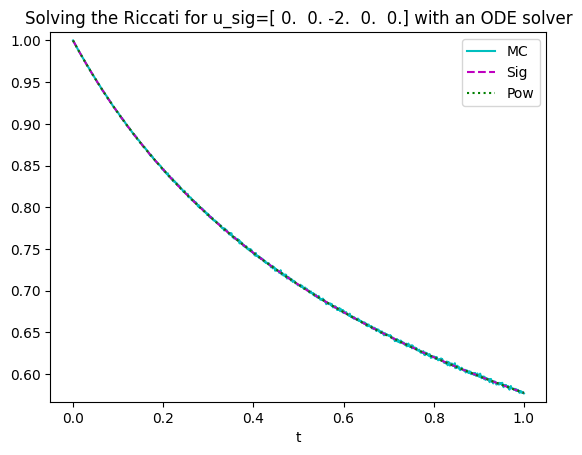

In [ ]:
#Monte Carlo
#MonteCarlo_CoD = CoD(np.real(MonteCarlo),n_MC, n_time)
plt.plot(np.linspace(0,T,n_MC),MonteCarlo,'c',label='MC');

#Sig Lift
plt.plot(timegrid,L_sig,'m--',label='Sig');

#Pow Lift
plt.plot(timegrid,L_pow,'g:',label='Pow');

plt.ylim(min(MonteCarlo.real-0.01),max(MonteCarlo.real)+0.01)
plt.xlabel("t")
plt.title(f'Solving the Riccati for u_sig={u_sig.real} with an ODE solver')
plt.legend();